<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme des régions de confiance </h1>
</center>

# Régions de confiance avec Pas de Cauchy 

## Implémentation 

1. Coder l'algorithme du pas de Cauchy dans le fichier `src/cauchy.jl`). La spécification de cet algorithme est donnée dans le fichier.
2. Ecrire des tests exhaustifs (qui testent tous les cas de figure possibles) pour votre algorithme du pas de Cauchy. Vous remplirez pour cela le fichier `test/tester_cauchy.jl` sur le modèle des autres fichiers de tests et vous exécuterez dans la cellule de code ci-après ces tests.

In [20]:
include("../src/cauchy.jl")         # votre algorithme
include("../test/tester_cauchy.jl") # la fonction pour tester votre algorithme

#
tester_cauchy(cauchy); # tester l'algorithme

Test Summary: | Pass  Total  Time
Pas de Cauchy |    2      2  0.0s


3. Coder l'algorithme des régions de confiance (fichier `src/regions_de_confiance.jl`). Sa spécification est donnée dans le fichier.
4. Vérifier que les tests ci-dessous passent.

In [29]:
include("../src/regions_de_confiance.jl")
include("../test/tester_rc_cauchy.jl")

#
afficher = false # si true, alors affiche les résultats des algorithmes

#
tester_rc_cauchy(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : false

Test Summary:        | Pass  Total  Time
RC et pas de Cauchy  |   15     15  3.8s


## Interprétation 

<!-- Pour ces questions, des représentations graphiques sont attendues pour corroborer vos réponses. -->

1. Soit la fonction $f_1 \colon \mathbb{R}^3 \to \mathbb{R}$ définie par
$$ 
    f_1(x_1,x_2, x_3) = 2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2
$$ 
Quelle relation lie la fonction $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de l'algorithme de Newton et celui des régions de confiance avec le pas de Cauchy sur cette fonction.

2. Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. Sur quel(s) autre(s) paramètre(s) peut-on jouer
pour essayer d’améliorer cette performance ? Étudier l’influence d’au moins deux de
ces paramètres. Pour cela vous ferez des tests numériques et donnerez les résultats sous forme de tableaux et de graphiques.

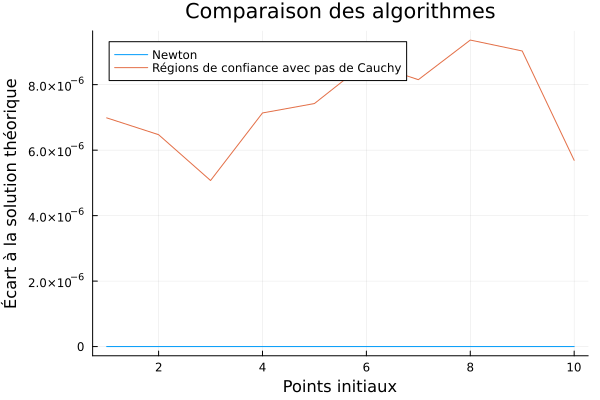

In [20]:
"""
1. f1 étant une forme quadratique, son développement de Taylor à l'ordre 2 en n'importe quel point est exact, ici en 0:
f1(x) = 0.5xᵀHx + gᵀx + c où:
  - c = 18
  - g = [-12 ; -12 ; -12]
  - H = [6 4 4 ; 4 10 2 ; 4 2 6]
Ainsi sur cet exemple, la méthode de Newton sera la plus efficace puisque qu'el convergera immédiatement et exactement vers la solution.

2. Pour essayer d'améliorer l'algorithme région de confiance on peut chercher à jouer sur les facteurs γ de mise à jour de la région de confiance, et les seuils η.
"""

using Plots
include("../src/newton.jl")
include("../src/regions_de_confiance.jl")
include("../test/fonctions_de_tests.jl")


f1(x) = 2*(x[1] + x[2] + x[3] -3)^2 + (x[1] - x[2])^2 + (x[2] - x[3])^2
grad_f1(x) = [4*(x[1] + x[2] + x[3] - 3) + 2*(x[1] - x[2]), 4*(x[1] + x[2] + x[3] - 3) - 2*(x[1] - x[2]) + 2*(x[2] - x[3]), 4*(x[1] + x[2] + x[3] - 3) - 2*(x[2] - x[3])]
hess_f1(x) = [6 2 4; 2 8 2; 4 2 6]

sol = [1; 1; 1]

x0s = [rand(3) for _ in 1:10]
ecarts_newton = []
ecarts_rc_cauchy = []

for x0 in x0s
    #Newton
    x_sol_newton, _, _, _, _ = newton(f1, grad_f1, hess_f1, x0)
    push!(ecarts_newton, norm(x_sol_newton - sol))

    #RC Cauchy
    x_sol_rc_cauchy, _, _, _, _ = regions_de_confiance(f1, grad_f1, hess_f1, x0, algo_pas="cauchy")
    push!(ecarts_rc_cauchy, norm(x_sol_rc_cauchy - sol))
end

plot(1:10, ecarts_newton, label="Newton", xlabel="Points initiaux", ylabel="Écart à la solution théorique", title="Comparaison des algorithmes")
plot!(1:10, ecarts_rc_cauchy, label="Régions de confiance avec pas de Cauchy")

# Régions de confiance avec gradient conjugué tronqué

## Implémentation 

1. Implémenter l’algorithme du gradient conjugué tronqué (fichier `src/gct.jl`). Sa spécification est dans le fichier.
2. Vérifier que les tests ci-dessous passent.

In [33]:
include("../src/gct.jl")
include("../test/tester_gct.jl")

#
tester_gct(gct);

Test Summary:             | Pass  Total  Time
Gradient conjugué tronqué |    9      9  0.0s


3. Intégrer l’algorithme du gradient conjugué tronqué dans le code des régions de confiance.
4. Vérifier que les tests ci-dessous passent.

In [34]:
include("../src/regions_de_confiance.jl")
include("../test/tester_rc_gct.jl")

#
afficher = false # si true, alors affiche les résultats des algorithmes

#
tester_rc_gct(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : false

Test Summary: | Pass  Total  Time
RC et gct     |   15     15  2.7s


## Interprétation  

Nous proposons de comparer l'utilisation du pas de Cauchy avec celle du gradient conjugué tronqué dans l'algorithme des régions de confiance.

**Remarques.**
* Nous vous demandons de réaliser des expérimentations numériques pour les comparaisons demandées ci-après.
* Vous devez utiliser l'argument optionnel `max_iter_gct` et la sortie `xs` de l'algorithme des régions de confiance.
* Vous pouvez comparer l'écart en norme entre les itérés de l'algorithme et la solution du problème.
* Vous trouverez des choses utiles dans le fichier `test/fonctions_de_tests.jl`.

1. Comparer dans le cas où l'on force le gradient conjugué tronqué à ne faire qu'une seule itération. Que remarquez vous ?
2. Comparer dans le cas général. Que remarquez vous ?
3. Quels sont les avantages et inconvénients des deux approches ?

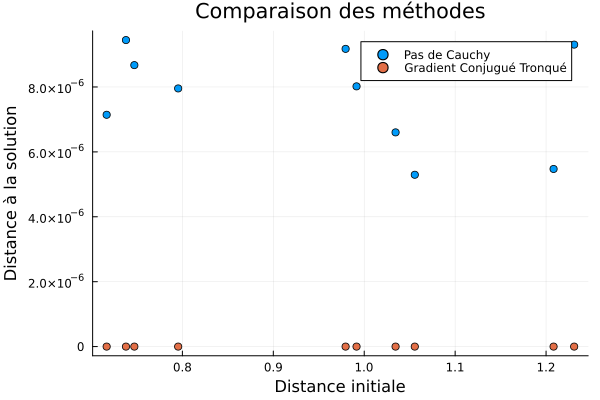

In [29]:
"""
1. Dans le cas d'une seule itération, on constate que le pas de cauchy et gct sont équivalents
3. On constate que la solutions obtenu avec gct est bien plus proche de la solution théorique que pas de cauchy mais est néanmoins beaucoup plus couteuse en terme de calcul.
"""

using Plots
include("../src/regions_de_confiance.jl")
include("../test/fonctions_de_tests.jl")

f1(x) = 2*(x[1] + x[2] + x[3] -3)^2 + (x[1] - x[2])^2 + (x[2] - x[3])^2
grad_f1(x) = [4*(x[1] + x[2] + x[3] - 3) + 2*(x[1] - x[2]), 4*(x[1] + x[2] + x[3] - 3) - 2*(x[1] - x[2]) + 2*(x[2] - x[3]), 4*(x[1] + x[2] + x[3] - 3) - 2*(x[2] - x[3])]
hess_f1(x) = [6 2 4; 2 8 2; 4 2 6]

sol = [1; 1; 1]

x0s = [rand(3) for _ in 1:10]

distances_initiales = []
distances_cauchy = []
distances_gct = []

for x0 in x0s
    # Calculs distances initiales
    push!(distances_initiales, norm(x0 - sol_exacte_fct1))

    # RC Cauchy
    x_sol_cauchy,_,_,_,_ = regions_de_confiance(f1, grad_f1, hess_f1, x0, algo_pas="cauchy")
    push!(distances_cauchy, norm(x_sol_cauchy - sol_exacte_fct1))

    # RC GCT
    x_sol_gct,_,_,_,_ = regions_de_confiance(f1, grad_f1, hess_f1, x0, algo_pas="gct")
    push!(distances_gct, norm(x_sol_gct - sol_exacte_fct1))
end

scatter(distances_initiales, distances_cauchy, label="Pas de Cauchy", xlabel="Distance initiale", ylabel="Distance à la solution", title="Comparaison des méthodes", legend=:topright)
scatter!(distances_initiales, distances_gct, label="Gradient Conjugué Tronqué")
